In [47]:
import pandas as pd
import seaborn as sns
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
df = pd.read_csv("SHR65_23.csv")

In [35]:
print(df.columns)

Index(['ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype', 'Source',
       'Solved', 'Year', 'Month', 'Incident', 'ActionType', 'Homicide',
       'Situation', 'VicAge', 'VicSex', 'VicRace', 'VicEthnic', 'OffAge',
       'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship',
       'Circumstance', 'Subcircum', 'VicCount', 'OffCount', 'FileDate', 'MSA'],
      dtype='object')


In [58]:
#subset for columns that are important
new_df = df[['State', "Agency", "Year", "Month", "Homicide", "VicAge", "VicSex", "VicRace", "VicEthnic", "OffAge", "OffSex", "OffRace", "OffEthnic", "Weapon", "VicCount", "OffCount"  ]]
new_df

,State,Agency,Year,Month,Homicide,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,VicCount,OffCount
0,Alaska,Anchorage,1976,March,Murder and non-negligent manslaughter,48,Male,Unknown,Unknown or not reported,68,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",0,0
1,Alaska,Anchorage,1976,April,Murder and non-negligent manslaughter,33,Female,White,Unknown or not reported,44,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",0,0
2,Alaska,Anchorage,1976,June,Murder and non-negligent manslaughter,38,Male,White,Unknown or not reported,27,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",0,0
3,Alaska,Anchorage,1976,June,Murder and non-negligent manslaughter,41,Male,White,Unknown or not reported,34,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",0,0
4,Alaska,Anchorage,1976,July,Murder and non-negligent manslaughter,33,Male,American Indian or Alaskan Native,Unknown or not reported,37,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894631,Wyoming,Wind River Agency,2018,August,Murder and non-negligent manslaughter,29,Male,American Indian or Alaskan Native,Not of Hispanic origin,999,Unknown,Unknown,Unknown or not reported,Shotgun,0,0
894632,Wyoming,Wind River Agency,2019,August,Murder and non-negligent manslaughter,29,Male,American Indian or Alaskan Native,Not of Hispanic origin,30,Male,American Indian or Alaskan Native,Not of Hispanic origin,"Firearm, type not stated",0,0
894633,Wyoming,Wind River Agency,2023,March,Murder and non-negligent manslaughter,44,Male,American Indian or Alaskan Native,Not of Hispanic origin,33,Male,American Indian or Alaskan Native,Not of Hispanic origin,"Firearm, type not stated",0,0
894634,Wyoming,Wind River Agency,2023,March,Murder and non-negligent manslaughter,37,Male,American Indian or Alaskan Native,Not of Hispanic origin,29,Male,American Indian or Alaskan Native,Not of Hispanic origin,Other or type unknown,0,0


Now we can check if there are any missing values

In [37]:
#Checking for any missing values in the data
for col in new_df.columns:
  print(col)
  print(new_df[col].isna().sum())

State
0
Agency
0
Year
0
Month
0
Homicide
0
VicAge
0
VicSex
0
VicRace
0
VicEthnic
0
OffAge
0
OffSex
0
OffRace
0
OffEthnic
0
Weapon
0
VicCount
0
OffCount
0


In [59]:
new_df = new_df[new_df['State'] == "Virginia"]
new_df = new_df[new_df['Year']<=2004]
new_df = new_df[new_df['Year']>=1998]
new_df.shape

(2774, 16)

In [60]:
print(new_df['Weapon'].unique())
new_df["Weapon"] = new_df['Weapon'].replace(["Firearm, type not stated", "Handgun - pistol, revolver, etc", "Other gun", "Rifle", "Shotgun"], 'Firearm')
new_df["Weapon"] = new_df['Weapon'].replace(["Personal weapons, includes beating", "Blunt object - hammer, club, etc", "Pushed or thrown out window", "Strangulation - hanging"], 'Interpersonal Violence')
new_df["Weapon"] = new_df['Weapon'].replace(["Narcotics or drugs, sleeping pills", "Poison - does not include gas"], 'Substance')
new_df["Weapon"] = new_df['Weapon'].replace(["Other or type unknown", "Asphyxiation - includes death by gas"], "Other")

['Shotgun' 'Firearm, type not stated' 'Handgun - pistol, revolver, etc'
 'Other or type unknown' 'Blunt object - hammer, club, etc' 'Rifle'
 'Knife or cutting instrument' 'Personal weapons, includes beating' 'Fire'
 'Narcotics or drugs, sleeping pills' 'Other gun'
 'Strangulation - hanging' 'Asphyxiation - includes death by gas'
 'Poison - does not include gas']


In [61]:
print(new_df['OffAge'].unique())
#see the value 999, which is a place holder
new_df["OffAge"] = new_df['OffAge'].replace(999, np.nan)
print(new_df['OffAge'].unique())

[ 37 999  15  21  17  27  36  57  29  44  71  20  43  47  18  26  42  39
  35  25  33  23  31  19  24  73  41  22  38  65  59  16  32  51  54  53
  30  70  67  45  48  34  55  49  40  46  68  56  52  28  63  50  64  85
  61  75  58  60  78  77  69  82  84  74  66  62  81  87  98  14  79  86
  13  10  76]
[37. nan 15. 21. 17. 27. 36. 57. 29. 44. 71. 20. 43. 47. 18. 26. 42. 39.
 35. 25. 33. 23. 31. 19. 24. 73. 41. 22. 38. 65. 59. 16. 32. 51. 54. 53.
 30. 70. 67. 45. 48. 34. 55. 49. 40. 46. 68. 56. 52. 28. 63. 50. 64. 85.
 61. 75. 58. 60. 78. 77. 69. 82. 84. 74. 66. 62. 81. 87. 98. 14. 79. 86.
 13. 10. 76.]


In [63]:

print(new_df['VicAge'].unique())
#see the value 999, which is a place holder
new_df["VicAge"] = new_df['VicAge'].replace(999, np.nan)
print(new_df['VicAge'].unique())

[ 54  64  78  23  25  37  29  13  53  46  20  43  68  51  22  47  39  28
  30  21   3  41  56  24  62  77  40  17   4  26  31  34  35 999  52  36
  44  27  33  72  18   6  19   1  14  38  70  42  65  45  32   2  50  81
  63  55  58  48  75  74  80  69   8  57  11  16  10  49   0  15  67   7
  66  90  61  71  12  84  85  83  59   5  79  60  73  82  98  76  87  86
  93   9  89  88  99  97  94  91  92]
[54. 64. 78. 23. 25. 37. 29. 13. 53. 46. 20. 43. 68. 51. 22. 47. 39. 28.
 30. 21.  3. 41. 56. 24. 62. 77. 40. 17.  4. 26. 31. 34. 35. nan 52. 36.
 44. 27. 33. 72. 18.  6. 19.  1. 14. 38. 70. 42. 65. 45. 32.  2. 50. 81.
 63. 55. 58. 48. 75. 74. 80. 69.  8. 57. 11. 16. 10. 49.  0. 15. 67.  7.
 66. 90. 61. 71. 12. 84. 85. 83. 59.  5. 79. 60. 73. 82. 98. 76. 87. 86.
 93.  9. 89. 88. 99. 97. 94. 91. 92.]


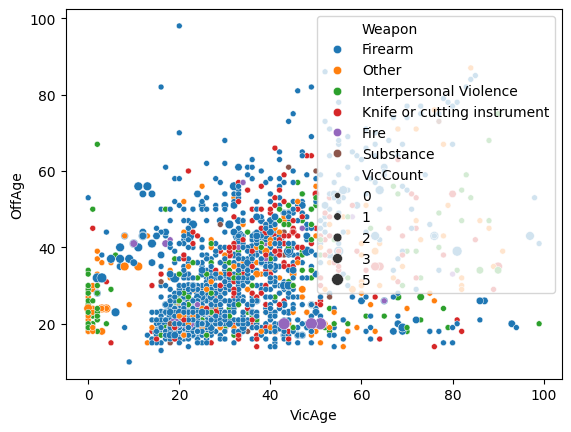

In [64]:
sns.scatterplot(data = new_df, x = "VicAge", y = "OffAge", hue = "Weapon", size = "VicCount")
plt.show()

In [68]:
new_df['Agency'] = new_df['Agency'].str.replace("State Police :", "")
print(new_df['Agency'].unique())

['Accomack County' 'Chincoteague' 'Onley'
 'Albemarle County Police Department' 'Alleghany County' 'Amelia County'
 'Amherst County' 'Appomattox County' 'Arlington County Police Department'
 'Augusta County' ': Augusta County' 'Bath County' 'Bedford County'
 'Bedford' ': Bedford County' ': Bland County' 'Botetourt County'
 'Brunswick County' 'Buchanan County' ': Buchanan County'
 'Campbell County' 'Altavista' 'Brookneal' ': Campbell County'
 'Caroline County' ': Caroline County' 'Carroll County'
 ': Charles City County' 'Charlotte County' 'Chesterfield' 'Clarke County'
 ': Clarke County' 'Craig County' 'Culpeper County' 'Culpeper'
 'Cumberland County' 'Dickenson County' 'Dinwiddie County'
 ': Dinwiddie County' 'Essex County' 'Tappahannock'
 'Fairfax County Police Department' 'Herndon' 'Fauquier County'
 'Warrenton' ': Fauquier County' 'Floyd County' ': Floyd County'
 'Fluvanna County' 'Franklin County' 'Rocky Mount' ': Franklin County'
 'Frederick County' ': Frederick County' 'Giles Co

In [78]:
new_df_group = new_df.groupby(['Agency', "Weapon"]).size().reset_index(name = "Count")
print(new_df_group)

                Agency                       Weapon  Count
0     : Augusta County       Interpersonal Violence      1
1     : Bedford County                        Other      1
2       : Bland County                        Other      3
3    : Buchanan County                      Firearm      7
4    : Campbell County  Knife or cutting instrument      1
..                 ...                          ...    ...
439         Wytheville                      Firearm      1
440         Wytheville  Knife or cutting instrument      1
441         Wytheville                        Other      1
442        York County                      Firearm      4
443        York County  Knife or cutting instrument      1

[444 rows x 3 columns]


In [70]:
geolocator = Nominatim(user_agent="Project")
location = geolocator.geocode("Arlington, Virginia")
print(location.longitude)
print(location.latitude)

-77.0893094
38.8769326
